# Linear Regression

### Preliminaries

- Goal 
  - Maximum likelihood estimates for various linear regression variants
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 140-144      

### Regression - Illustration


<img src="./figures/fig-bishop12.png" width=300px>

Given a set of (noisy) data measurements, find the 'best' relation between an input variable $x$ and input-dependent outcomes $y$.



### The Regression Model


- Observe $N$ IID data **pairs** $D=\{(x_1,y_1),\dotsc,(x_N,y_N)\}$ with $x_n \in \mathbb{R}^D$ and $y_n \in \mathbb{R}$.


- <span style="color:blue">[Q.]</span> We could try to build a model for the data by density estimation, $p(x,y)$, but what if we are interested only in (a model for) the responses $y_n$ for **given inputs** $x_n$?


- <span style="color:blue">[A.]</span> We will build models for the conditional distribution $p(y|x)$. 
  - Note that, since $p(x,y)=p(y|x)\, p(x)$, this is a building block for the joint data density.


- In a _regression model_, we try to 'explain the data' by a purely deterministic term $f(x,w)$, plus a purely random term $\epsilon_n$ for 'unexplained noise',
    $$
    y_n  = f(x_n,w) + \epsilon_n
    $$




###  Model Specification for Linear Regression

-  In **linear** regression, we assume that 
$$f(x,w)=w^T x \,.$$

-  In **ordinary linear regression**, the noise process $\epsilon_n$ is zero-mean Gaussian with constant variance $\sigma^2$, i.e.
$$
y_n  = w^T x_n  + \mathcal{N}(0,\sigma^2) \,,
$$
or equivalently, the likelihood model is 
$$
p(y_n|\,x_n,w) = \mathcal{N}(y_n|\,w^T x_n,\sigma^2) \,.
$$

-  Remember that for full Bayesian learning we should also choose a prior $p(w)$; In ML estimation, the prior is uniformly distributed (so it can be ignored).
<!--- 
%$y_n$ is Gaussian around $\theta^T x_n$ with `unexplained' noise $\sigma^2$.
% -   Note that 1st term RHS is purely deterministic; 2nd term is purely random and independent of $x_n$
%-  Choose a prior over the parameters (possibly flat: $\sigma\rightarrow \infty$)
-->



###  ML Estimation for Linear Regression Model

-  **Inference** by ML; Let's first work out the log-likelihood for $w$,
$$\begin{align*}
\log p(D|w) &\stackrel{\text{IID}}{=} \sum_n \log \mathcal{N}(y_n|\,w^T x_n,\sigma^2)\\  &\propto -\frac{1}{2\sigma^2} \sum_{n} {(y_n - w^T x_n)^2}\\
    &= -\frac{1}{2\sigma^2}\left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X} w } \right)
\end{align*}$$
where  we defined $N\times 1$ vector $y  = \left(y_1 ,y_2 , \ldots ,y_N \right)^T$ and $(N\times D)$-dim matrix $\mathbf{X}  = \left( x_1 ,x_2 , \ldots ,x_n \right)^T$.

-  Set the derivative $$\nabla_{w} \log p(D|w) = \frac{1}{\sigma^2} \mathbf{X}^T(y-\mathbf{X} w)$$ to zero for
the maximum likelihood estimate
$$\begin{equation*}
\boxed{\hat w_{\text{ML}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y}
\end{equation*}$$


-  The matrix $\mathbf{X}^\dagger \equiv  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$ is also known as the **Moore-Penrose pseudo-inverse** (which is sort-of-an-inverse for non-square matrices).

-  Note that size ($N\times D$) of the data matrix $\mathbf{X}$ grows with number of observations, but the size ($K\times K$) of $\mathbf{X}^T\mathbf{X}$ is independent of training data set.


-  **Prediction** of new data points by
$$\begin{equation*}\hat y_{\text{new}} = \hat w_{\text{ML}}^T x_{\text{new}} = y^T \mathbf{X} \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \, x_{\text{new}}
\end{equation*}$$

- Also note that the _prediction_ of a new data point
$$
\hat y_{\text{new}} = \hat w_{\text{ML}}^T x_{\text{new}} = x_{\text{new}}^T\hat{w}_{\text{ML}} = \left( x_{\text{new}}^T \mathbf{X}^\dagger \right)y
$$
is a linear combination of the previous data points $y  = \left( {y_1 ,y_1 , \ldots ,y_N } \right)^T$.


###  Deterministic Least-Squares Regression

-  (You may say that) we don't need to work with probabilistic models. E.g., there's also the deterministic **least-squares** solution: minimize sum of squared errors,
$$ \hat w_{LS} = \arg\min_{w} \sum_n {\left( {y_n  - w ^T x_n } \right)} ^2 $$

-  Setting the derivative 
$$ \partial \left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X}w } \right) / \partial w = -2 \mathbf{X}^T \left(y - \mathbf{X} w  \right)
$$
to zero yields the **normal equations** 
$$\mathbf{X}^T\mathbf{X} \hat w_{\text{LS}} = \mathbf{X}^T y
$$ 
and consequently
$$
\boxed{\hat w_{\text{LS}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y} 
$$

$\Rightarrow$ Least-squares regression ($\hat w_{\text{LS}}$) corresponds to (probabilistic) maximum likelihood ($\hat w_{\text{ML}}$) if 
  1. **IID samples** (determines how errors are combined), and
  1.  Noise $\epsilon_n \sim \mathcal{N}(0,\,\sigma^2)$ is **Gaussian** (determines error metric)      
  




###  Probabilistic vs. Deterministic Approach

-  The (deterministic) least-squares approach assumed IID Gaussian distributed data, but these assumptions are not obvious from looking at the least-squares (LS) criterion.

-  If the data were better modeled by non-Gaussian assumptions (or not IID), then LS might not be appropriate.

-  The probabilistic approach makes all these issues completely transparent by focusing on the **model specification** rather than the error criterion.

-  Next, we will show this by two examples: (1) samples not identically distributed, and (2) few data points.






###  Not Identically Distributed Data

-  What if we assume that the variance of the measurement error varies with the sampling index,  $\epsilon_n \sim \mathcal{N}(0,\sigma_n^2)$?

- Let's make the log-likelihood again: 
$$\begin{align*}
\mathrm{L(w)} &\triangleq \log p(D|w) \\ 
  &\propto -\frac{1}{2} \sum_n \frac{(y_n-w^T x_n)^2}{\sigma_n^2} \\ 
  &= -\frac{1}{2} (y- \mathbf{X}w)^T \Lambda (y- \mathbf{X} w)
\end{align*}$$
where  $\Lambda \triangleq \mathrm{diag}[1/\sigma_n^2]$.

-  Set derivative 
$$\partial \mathrm{L(w)} / \partial w = -\mathbf{X}^T\Lambda (y-\mathbf{X} w)$$ 
to zero to get the **normal equations** 
$$\mathbf{X}^T \Lambda \mathbf{X} \hat{w}_{\text{WLS}} = \mathbf{X}^T \Lambda y$$ 
and consequently 
$$ \boxed{\hat{w}_{\text{WLS}} = \left(\mathbf{X}^T \Lambda \mathbf{X}\right)^{-1} \mathbf{X}^T \Lambda y}$$ 

-  This is called the **Weighted Least Squares** (WLS) solution. (Note that we just stumbled upon it, the crucial aspect is appropriate model specification!)

-  Note also that the dimension of $\Lambda$ grows with the number of data points. In general, models for which the number of parameters grow as the number of observations increase are called **non-parametric models**.


#### CODE EXAMPLE

We'll compare the Least Squares and Weighted Least Squares solutions for a simple linear regression model with input-dependent noise:

$$\begin{align*}
x &\sim \text{Unif}[0,1]\\
y|x &\sim \mathcal{N}(f(x), v(x))\\
f(x) &= 3x\\
v(x) &= 10e^{2x^2}-9.5\\
D &= \{(x_1,y_1),\ldots,(x_N,y_N)\}
\end{align*}$$

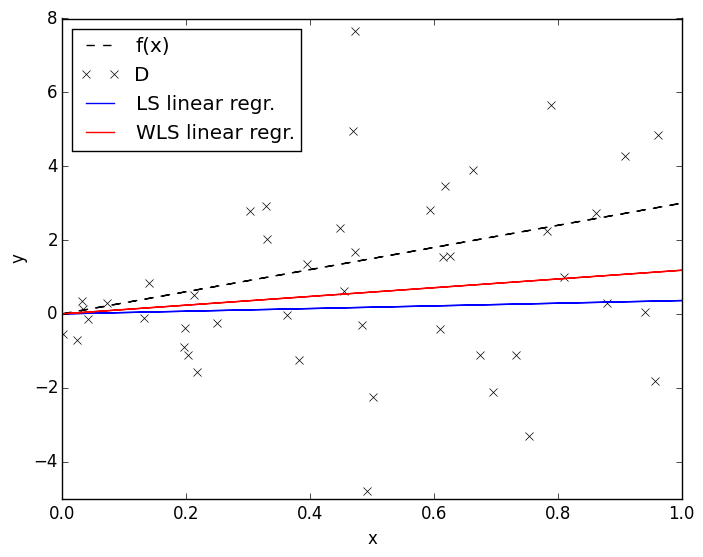

PyObject <matplotlib.legend.Legend object at 0x7f754a0d77f0>

In [1]:
using PyPlot
# Model specification: y|x ~ 𝒩(f(x), v(x))
f(X) = 3.*X
v(X) = exp(2*X.^2).*10 - 9.5 # Input dependent noise variance
X_test = [0.0, 1,0]
plot(X_test, f(X_test), "k--") # Plot f(x)

# Generate N samples (x,y), where x ~ Unif[0,1]
N = 50
X = rand(N)
y = f(X) + sqrt(v(X)) .* randn(N)
plot(X, y, "kx"); xlabel("x"); ylabel("y") # Plot samples

# LS regression
w_ls = inv(reshape(X'*X,1,1)) * X' * y # = pinv(X) * y
plot(X_test, w_ls.*X_test, "b-") # Plot LS solution

# Weighted LS regression
Λ = diagm(1./v(X))
w_wls = inv(reshape(X'*Λ*X,1,1)) * X' * Λ * y
plot(X_test, w_wls.*X_test, "r-") # Plot WLS solution
ylim([-5,8]); legend(["f(x)", "D", "LS linear regr.", "WLS linear regr."],loc=2)

#### END OF CODE EXAMPLE

###  Too Few Training Samples

-  <span style="color:blue">[Q.]</span>: If we have fewer training samples than input dimensions, $\mathbf{X}^T\mathbf{X}$ will not be invertible.

-  <span style="color:blue">[A.]</span>: In case of (expected) problems, **go back to full Bayesian!** Do proper model specification, Bayesian inference etc.

-  **Model specification**. Let's try a Gaussian prior for $w$ (why is this reasonable?),
$$
p(w) = \mathcal{N}(w|0,\Sigma) = \mathcal{N}(w|0,\varepsilon I)
$$

-  **Learning**. Let's do Bayesian inference,
$$\begin{align*}
\log p(w|D) &\propto \log p(D|w)p(w) \\
   &\stackrel{IID}{=} \log \sum_n p(y_n|x_n,w) + \log p(w)\\
   &= \log \sum_n \mathcal{N}(y_n|\,w^Tx_n,\sigma^2) + \log \mathcal{N}(w|0,\varepsilon I)\\
   &\propto \frac{1}{2\sigma^2}\left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X}w } \right)  + \frac{1}{2 \epsilon}w^T w
\end{align*}$$

-  **Done!** The posterior $p(w|D)$ specifies all we know about $w$ after seeing the data $D$
.
-  As discussed, for practical purposes, you often want a point estimate for $w$, rather than a posterior distribution.

-  For instance, let's take a **MAP estimate**. Set derivative 
$$\nabla_{w} \log p(w|D) = -\frac{1}{\sigma^2}\mathbf{X}^T(y-\mathbf{X}w) + \frac{1}{\varepsilon} w
$$ 
to zero, yielding
$$
\boxed{ \hat{w}_{\text{MAP}} = \left( \mathbf{X}^T\mathbf{X} + \frac{\sigma^2}{\varepsilon} I \right)^{-1}\mathbf{X}^T y }
$$

- Note that, in contrast to $\mathbf{X}^T\mathbf{X}$, the matrix $\left( \mathbf{X}^T\mathbf{X} + (\sigma^2 / \varepsilon) I \right)$ is always invertible! Why?

- Note also that $\hat{w}_{\text{LS}}$ is retrieved by letting $\varepsilon  \rightarrow \infty$. Does that make sense?



###  Adaptive Linear Regression

-  What if the data arrives one point at a time?


-  Two standard _adaptive_ linear regression approaches: RLS and LMS. Here we shortly recap the LMS approach.


-  **Least Mean Squares** (LMS) is gradient-descent on a 'local-in-time' approximation of the square-error cost function.


-  Define the cost-of-current-sample as  
$$\begin{equation*}
E_n(w) = \frac{1}{2}(y_n - w^Tx_n)^2
\end{equation*}$$ 
and track the optimum by gradient descent (at each sample index $n$):
$$\begin{equation*}
w_{n+1} = w_n - \eta \, \left. \frac{\partial E_n}{\partial w} \right|_{w_n}
\end{equation*}$$
which leads to the LMS update:
$$
\boxed{ w_{n+1} = w_n + \eta \, (y_n - w_n^T x_n) x_n }
$$

-  <span style="color:red">(OPTIONAL)</span> Is there also a Bayesian treatment of LMS? Sure, e.g., have a look at [G. Deng et al., _A model-based approach for the development of LMS algorithms_', ISCAS-05 symposium, 2005](./files/Deng-2005-A-model-based-approach-for-the-development-of-LMS-algorithms.pdf).



-----
_The cell below loads the style file_


In [2]:
open("../../styles/aipstyle.html") do f
    display("text/html", readall(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->